Install necessary packages

In [2]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


import pandas as pd


In [3]:
pip install -ace_tools


Usage:   
  /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install [options] <requirement specifier> [package-index-options] ...
  /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install [options] -r <requirements file> [package-index-options] ...
  /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install [options] [-e] <vcs project url> ...
  /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install [options] [-e] <local project path> ...
  /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install [options] <archive url/path> ...

no such option: -a
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load the triangle CSV file
triangle_df = pd.read_csv("triangle_data_2003_onwards.csv", index_col=0)

# Convert all values to float (some may be read as strings due to NaNs)
triangle_df = triangle_df.astype(float)

# Calculate development factors (link ratios)
link_ratios = []
for i in range(triangle_df.shape[1] - 1):
    numerators = triangle_df.iloc[:, i + 1] # The column ahead of the one we're calculating the factor for
    denominators = triangle_df.iloc[:, i] # The column we're calculating the factor for this give DY2/DY1
    valid = (~numerators.isna()) & (~denominators.isna()) & (denominators != 0)
    link_ratio = (numerators[valid] / denominators[valid]).mean()
    link_ratios.append(link_ratio)

# Project future values
projected_triangle = triangle_df.copy()
for i in range(projected_triangle.shape[0]):
    for j in range(projected_triangle.shape[1]):
        if pd.isna(projected_triangle.iloc[i, j]):
            if j == 0:
                break
            previous_val = projected_triangle.iloc[i, j - 1]
            if pd.notna(previous_val):
                factor_index = j - 1
                projected_val = previous_val * link_ratios[factor_index]
                projected_triangle.iloc[i, j] = projected_val

# Calculate ultimate claims
ultimate_claims = projected_triangle.max(axis=1)

# Calculate reserves
paid_to_date = triangle_df.max(axis=1)
reserves = ultimate_claims - paid_to_date

# Prepare a summary DataFrame
summary_df = pd.DataFrame({
    "Ultimate Claims": ultimate_claims,
    "Paid to Date": paid_to_date,
    "Reserve Estimate": reserves
})

summary_df.head()

,Ultimate Claims,Paid to Date,Reserve Estimate
2003,971.000000,971.0,0.000000
2004,956.000000,956.0,0.000000
2005,975.000000,975.0,0.000000
2006,1178.618328,997.0,181.618328
2007,1320.717253,971.0,349.717253


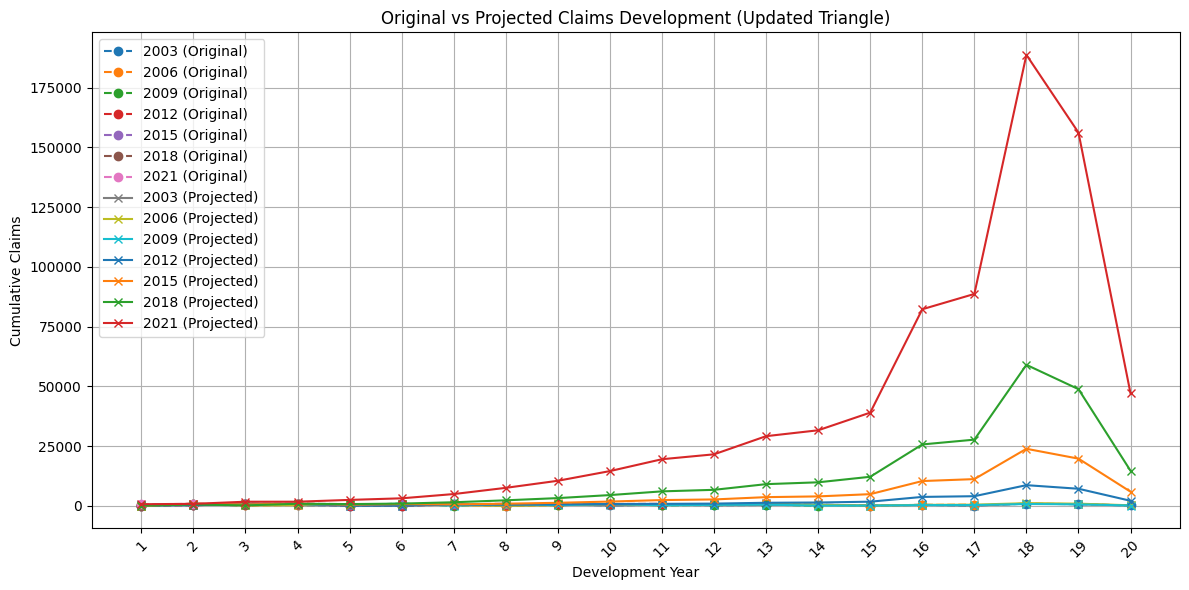

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot a subset of years to reduce clutter
for i in range(0, triangle_df.shape[0], 3):
    ax.plot(triangle_df.columns, triangle_df.iloc[i], marker='o', linestyle='--', label=f"{triangle_df.index[i]} (Original)")

for i in range(0, projected_triangle.shape[0], 3):
    ax.plot(projected_triangle.columns, projected_triangle.iloc[i], marker='0', linestyle='-', label=f"{projected_triangle.index[i]} (Projected)")

ax.set_title("Original vs Projected Claims Development (Updated Triangle)")
ax.set_xlabel("Development Year")
ax.set_ylabel("Cumulative Claims")
ax.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 📊 Interpretation of the Claims Development Graph

- **Rising Curves**: Claims grow over development years, which is expected in run-off triangles.
- **Dashed Lines**: Represent original observed data points.
- **Solid Lines**: Show projected values based on development factors.
- **Shape Insight**: 
  - Rapid early growth → quick claim settlement.
  - Gradual or prolonged growth → long-tail claims.
- **Projection Gaps**: The gap between the last real value and the projected ultimate indicates the reserve estimate.
- **Anomalies**: Large jumps or drops may suggest:
  - Outliers in past data.
  - Shifts in claims processing or unusual claims patterns.